In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

In [2]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [3]:
#Missing Values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


No Missing values


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


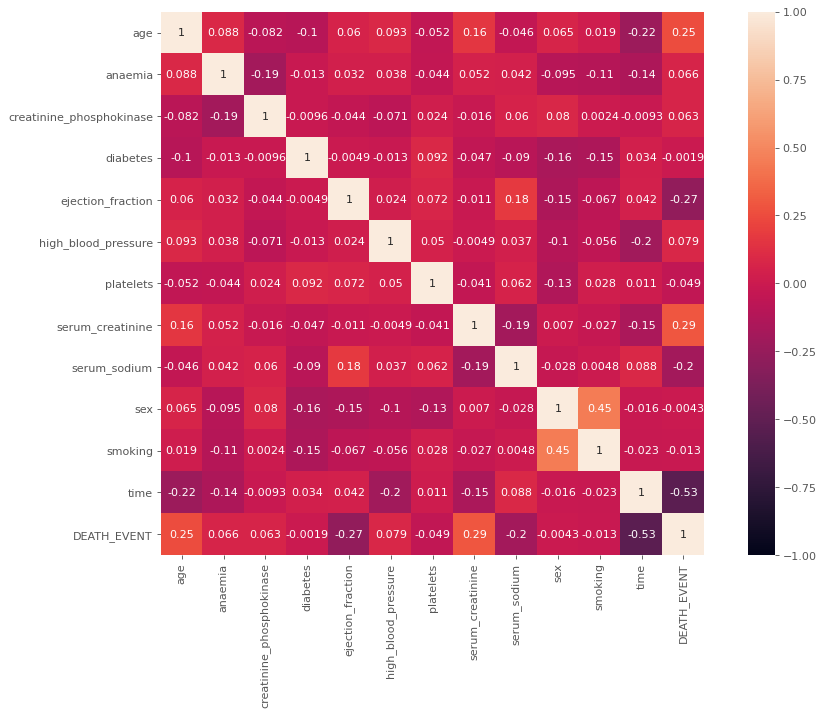

In [6]:
#Generate Heatmap
corrmat = data.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()


Top three variables by correlation : time (-ve correlation), serum_creatinine (+ve) &
ejection_fraction (-ve)

In [7]:
cat_col = ['DEATH_EVENT', 'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'anaemia']
num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']


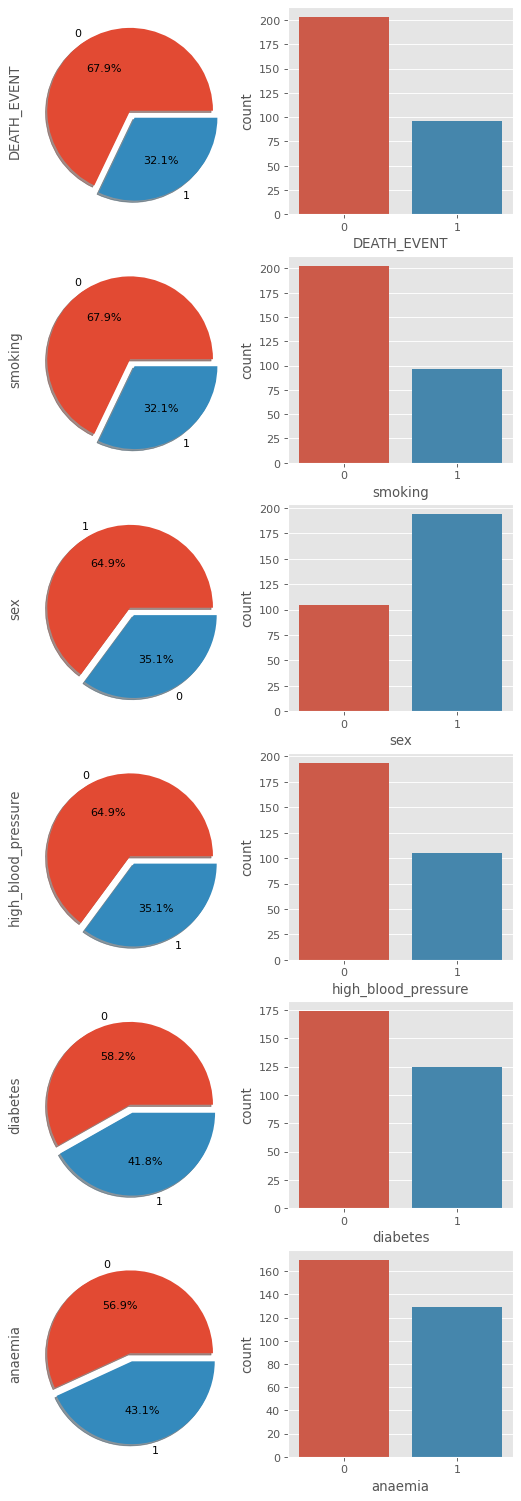

In [8]:
#Categorical Data
plt.figure(figsize=(8, 24))
count = 1
for cols in cat_col:
    plt.subplot(6, 2, count)
    data[cols].value_counts().plot.pie(explode=[0,0.1],shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(6, 2, count)
    sns.countplot(cols, data=data)
    count+=1

32.1% died, 32.1% smoke,35.1% are female, 
35.1% have HBP,41.8% have diabetes, 43.1% have anaemia


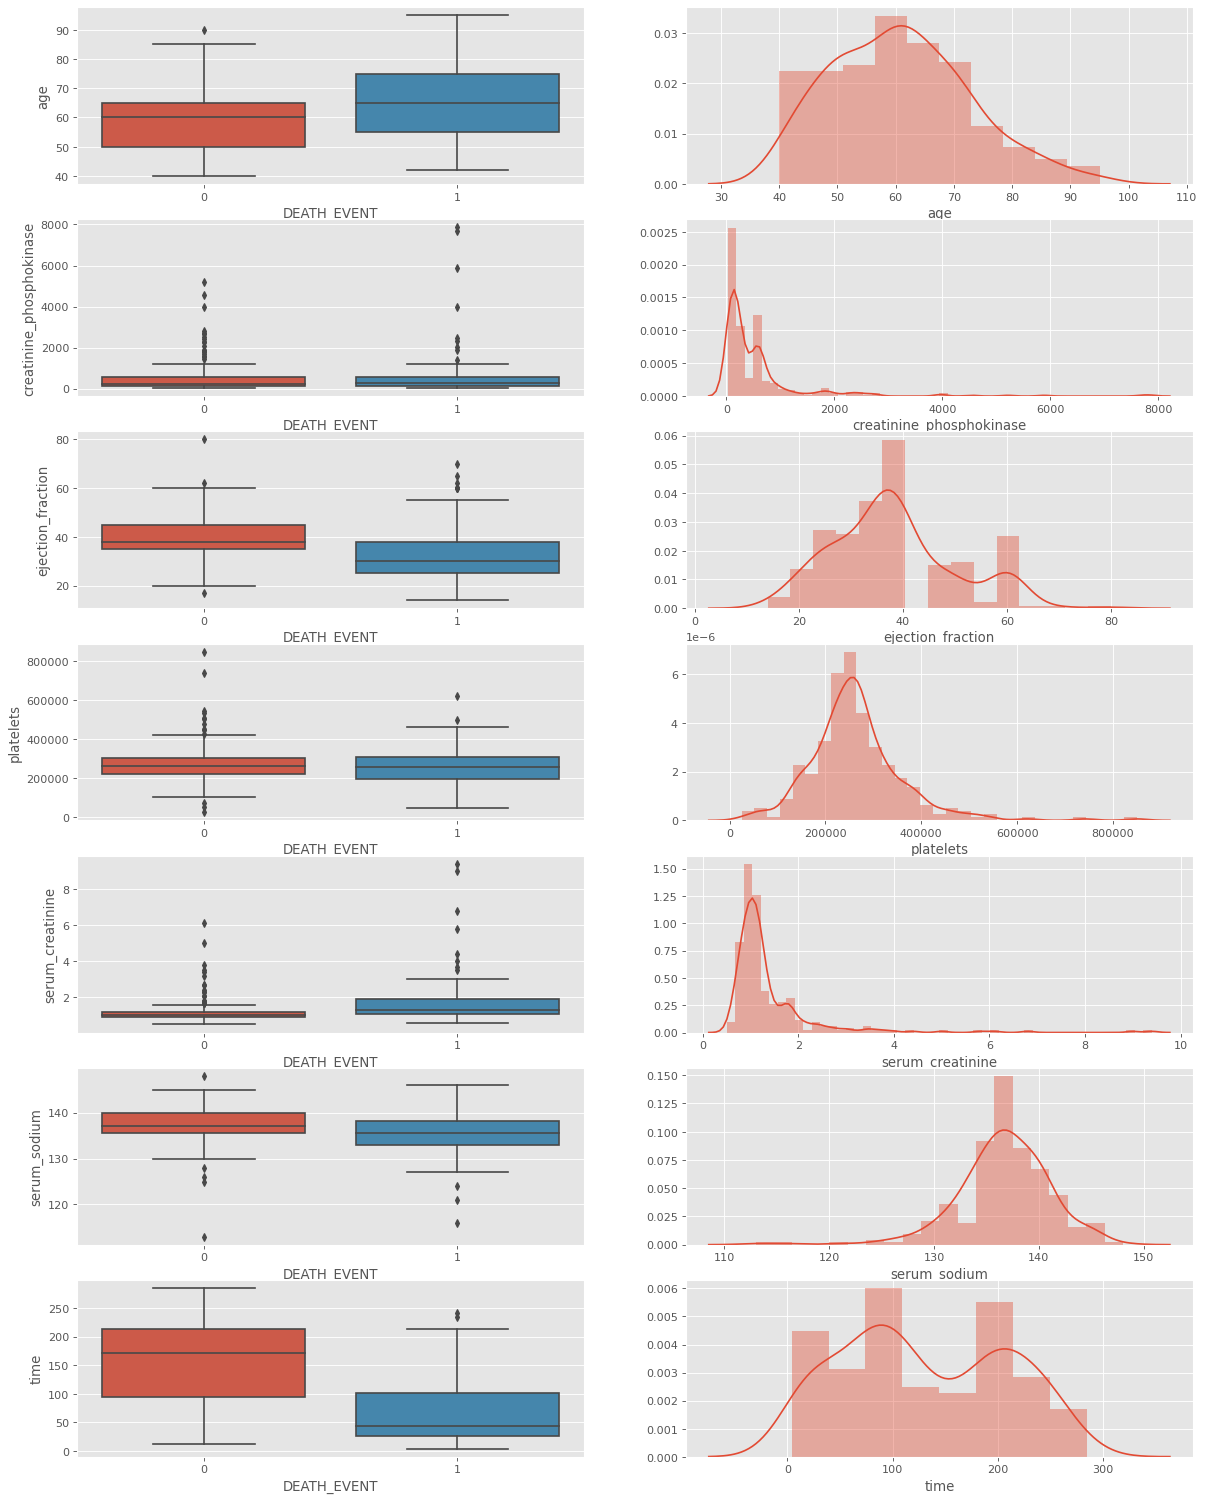

In [9]:
#Numerical Data
plt.figure(figsize=(18, 24))
count = 1
for cols in num_col:
    plt.subplot(7, 2, count)
    sns.boxplot(x='DEATH_EVENT', y= cols, data= data)
    count +=1
    plt.subplot(7, 2, count)
    sns.distplot(data.loc[data[cols].notna(), cols])
    count+=1

* Age of died (55-75) is more than who are alive(50-66)
* Not much diff for creatinine_phosphokinase in died vs alive
* Died : ejection_fraction (25-40) was less than alive(35-45) 
* Died : platelets-(200000-310000) is slightly higher than alive (210000-300000)
* Died : serum_creatinine (1.6-2) higher than alive (1-1.1)
* Died : serum_sodium (132-138) lower than alive (135-140)
* Died : time (25-100) way lower than alive (100-210)

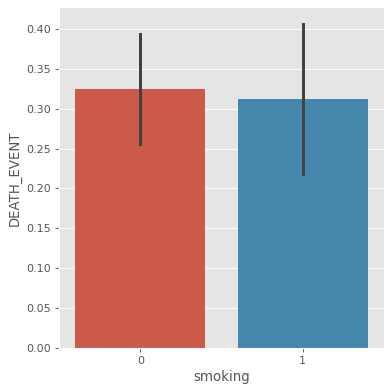

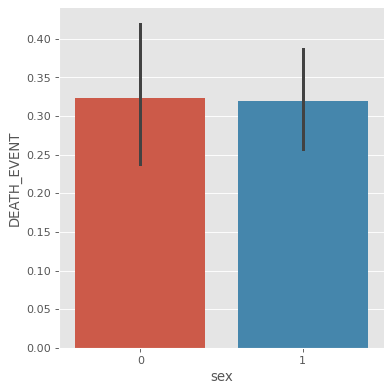

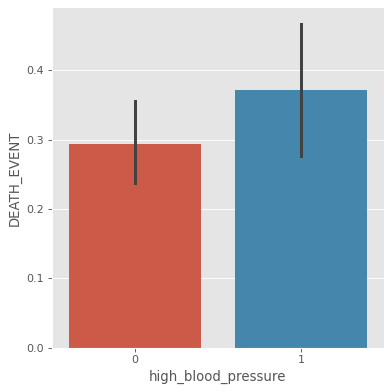

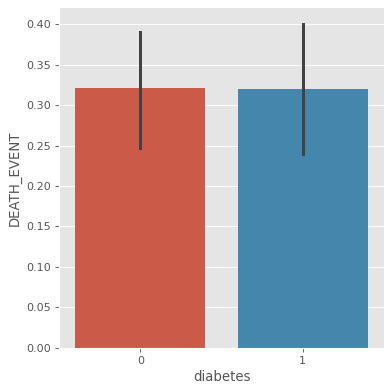

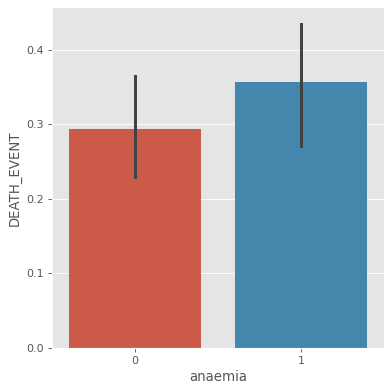

In [10]:
#Categorical Variables : Catplot
for cols in cat_col:
    if cols!='DEATH_EVENT':
        sns.catplot(x=cols,y='DEATH_EVENT',kind='bar',data=data)

Higher values of anemia & High blood pressure means higher death probability.
Smoking , diabetes & sex have not much effect on death event.

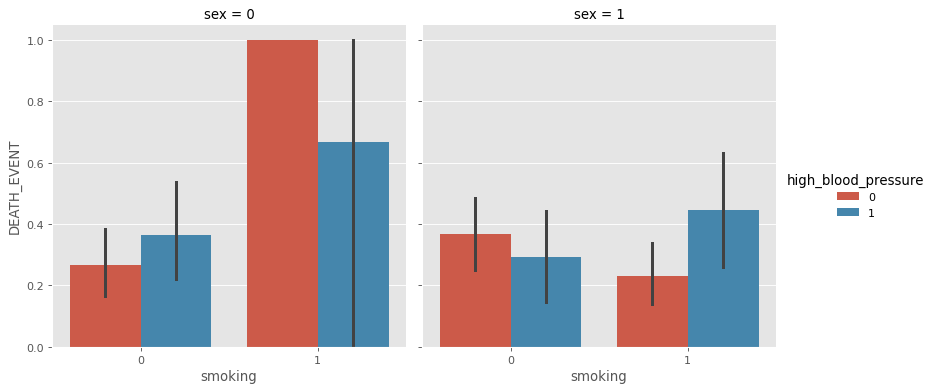

In [11]:
#Catplot smoking+DEATH_EVENT+sex+high_blood_pressure
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='high_blood_pressure')

* Female: Death Event Probability 
* Non-smoking females with HBP have higher death probablity than non-smoking females with No HBP. 
* smoking females with HBP have lesser death probability  than smoking females with No HBP. 
* Male: Death Event Probability. 
* Non-smoking males with HBP have lesser death probablity than non-smoking males with No HBP. 
* smoking males with HBP have higher death probability  than smoking males with No HBP. 

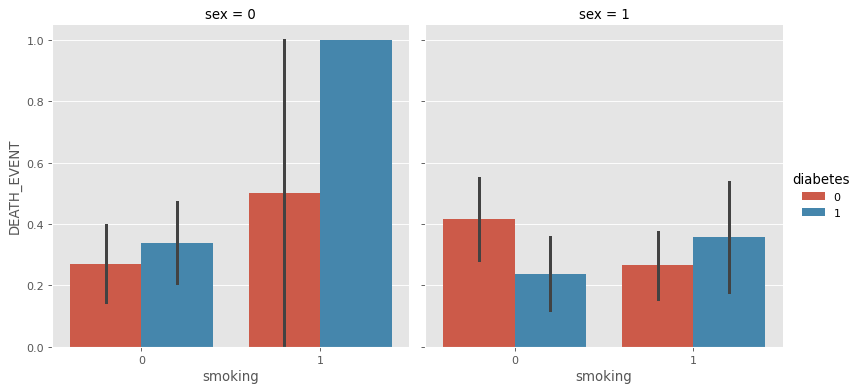

In [12]:
#Catplot smoking+DEATH_EVENT+sex+diabetes
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='diabetes')


* Female: Death Event Probability 
* Non-smoking females with diabetes have higher death probablity than non-smoking females with No diabetes 
* smoking females with diabetes have higher death probability  than smoking females with No diabetes 
* Male: Death Event Probability 
* Non-smoking males with diabetes have lesser death probablity than non-smoking males with No diabetes 
* smoking males with diabetes have higher death probability  than smoking males with No diabetes 

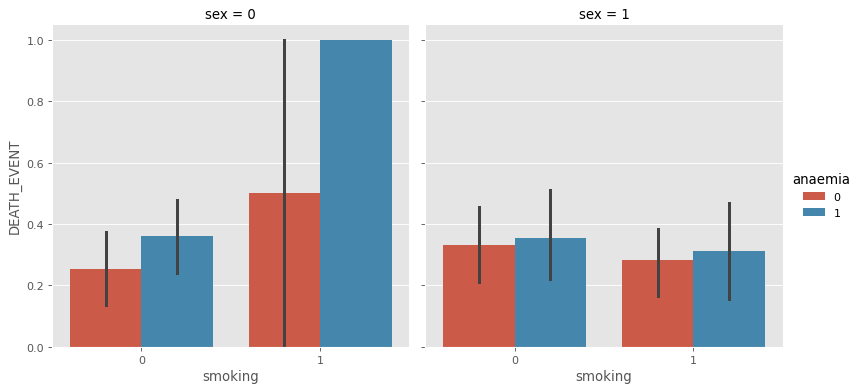

In [13]:
#Catplot smoking+DEATH_EVENT+sex+anaemia
sns.catplot(x='smoking',y='DEATH_EVENT',kind='bar',data=data,col='sex',hue='anaemia')

* Female: Death Event Probability 
* Non-smoking females with anaemia have higher death probablity than non-smoking females with No anaemia 
* smoking females with anaemia have higher death probability than smoking females with No anaemia 
* Male: Death Event Probability 
* Non-smoking males with anaemia have higher death probablity than non-smoking males with No anaemia 
* smoking males with anaemia have higher death probability than smoking males with No anaemia 


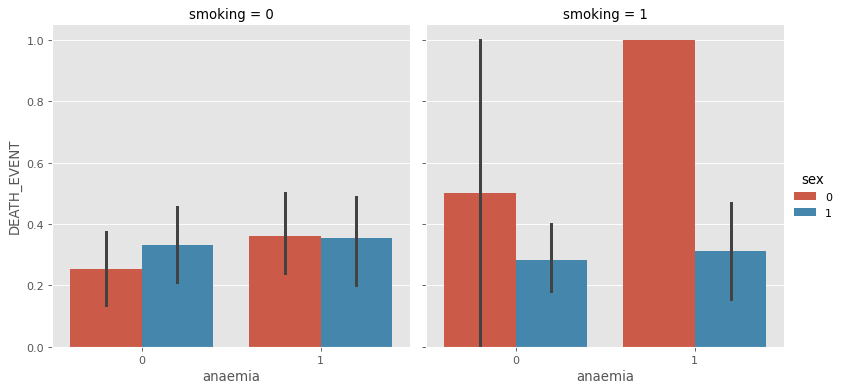

In [14]:
#Catplot anaemia+DEATH_EVENT+smoking+sex
sns.catplot(x='anaemia',y='DEATH_EVENT',kind='bar',data=data,col='smoking',hue='sex')


* Smoking females have higher probability of having death event irrespective of having anaemia or not than male
* Non-smoking male/female having anaemia have equal chances of death event
* Non-smoking male/female having no anaemia - male have higher chances of death event than females

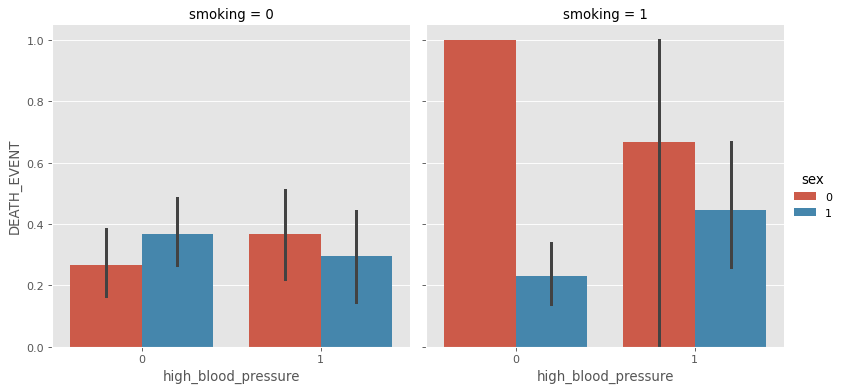

In [15]:
#Catplot high_blood_pressure+DEATH_EVENT+smoking+sex
sns.catplot(x='high_blood_pressure',y='DEATH_EVENT',kind='bar',data=data,col='smoking',hue='sex')


* Smoking females have higher probability of having death event irrespective of having HBP or not than male
* Non-smoking male having HBP have lesser chances of death event than nons moking-females
* Non-smoking male having no HBP have higher chances of death event than non-smoking females with no HBP


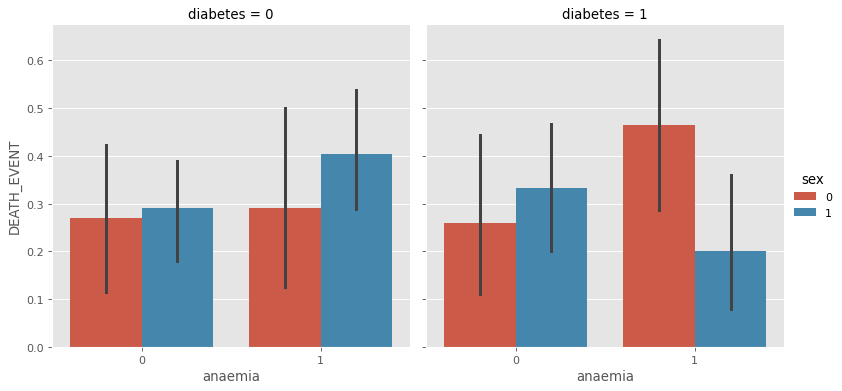

In [16]:
#Catplot anaemia+DEATH_EVENT+diabetes+sex
sns.catplot(x='anaemia',y='DEATH_EVENT',kind='bar',data=data,col='diabetes',hue='sex')


* Non-diabetic male/female - Irrespective of having anemia or not male have higher chances of death event than females
* diabetic male/female - female with no anaemia have lesser chance of death event than males with anaemia
* diabetic male/female - female with anaemia have higher chance of death event than males with anaemia 


* Analyse Numerical variables
* #num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

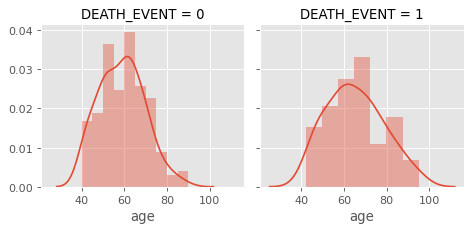

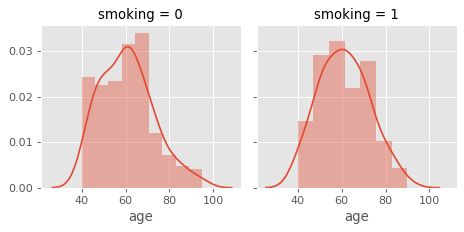

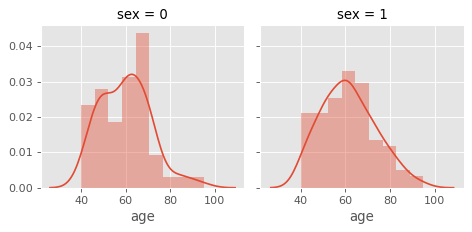

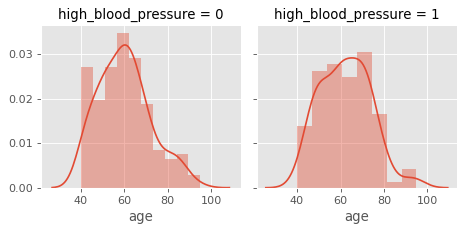

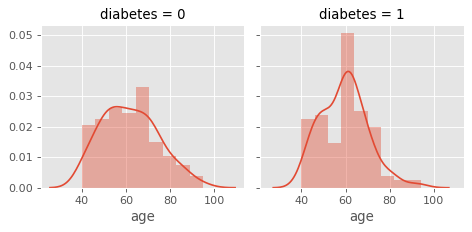

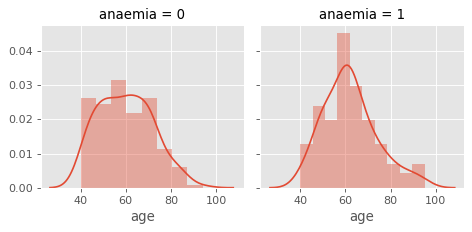

In [17]:
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "age")

Not much insights as the distribution looks same 

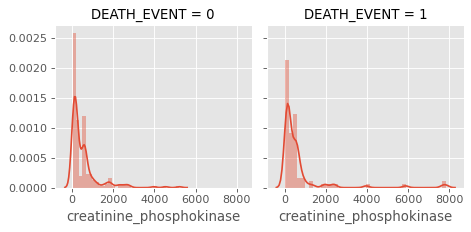

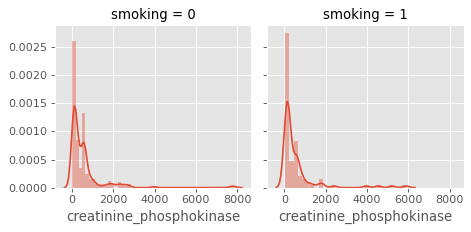

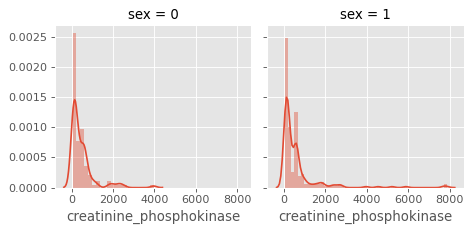

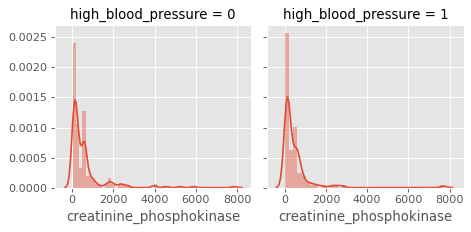

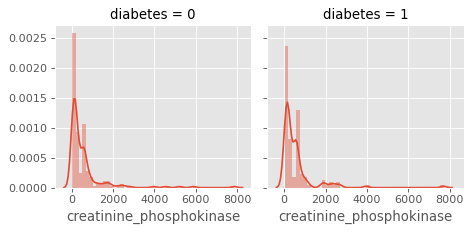

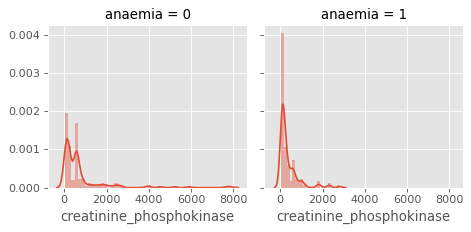

In [18]:
# Vaariable - creatinine_phosphokinase
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "creatinine_phosphokinase")
#Not much insights as the distribution looks same 

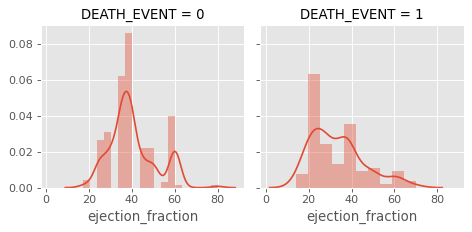

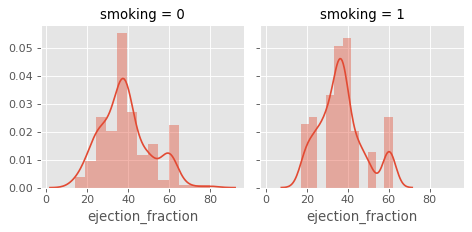

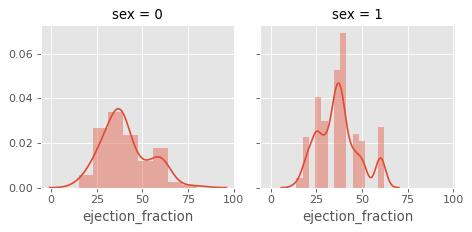

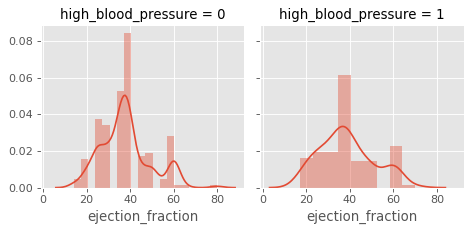

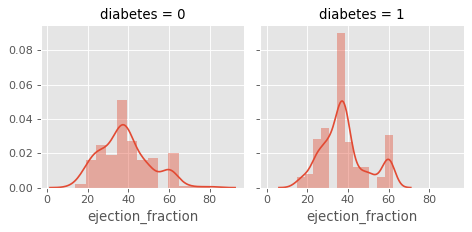

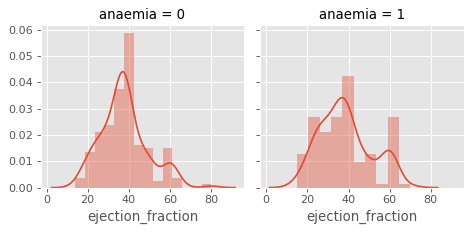

In [19]:
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "ejection_fraction")
#Not much insights as the distribution looks same 

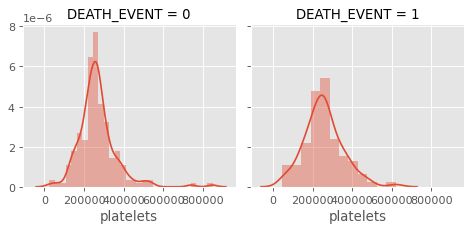

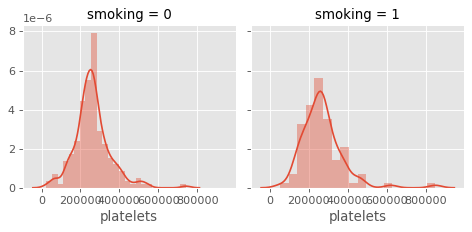

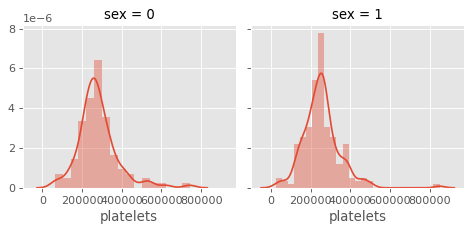

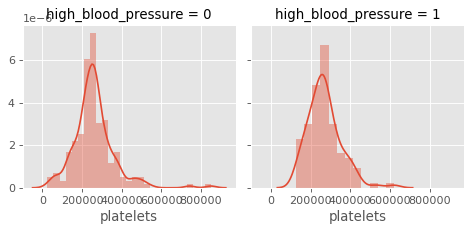

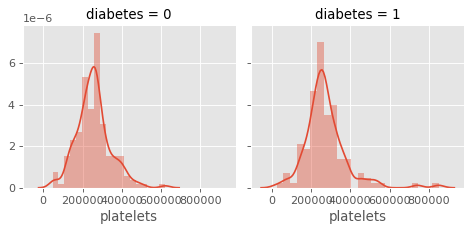

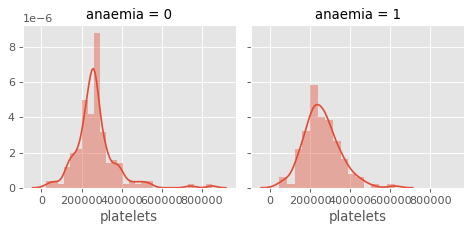

In [20]:
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "platelets")
#Not much insights as the distribution looks same 

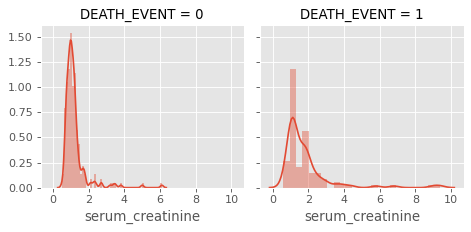

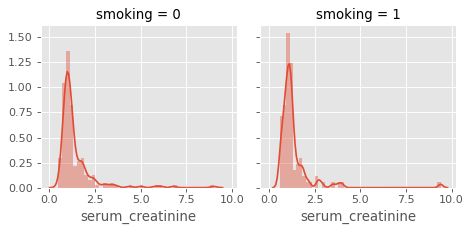

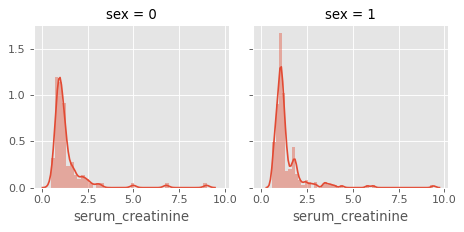

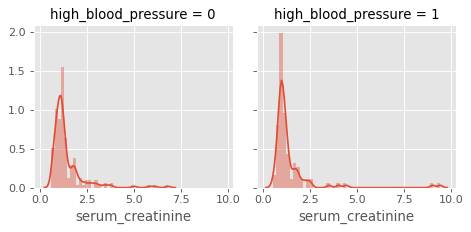

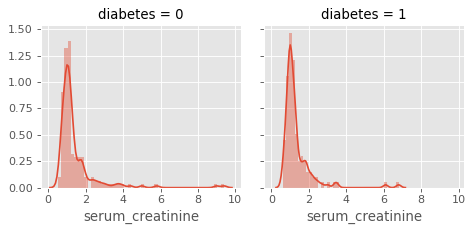

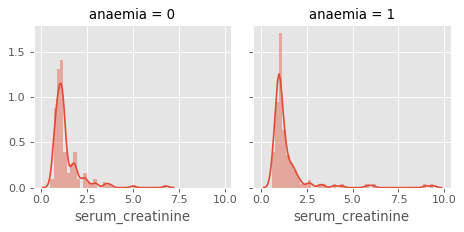

In [21]:
#serum_creatinine
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "serum_creatinine")
#Not much insights as the distribution looks same 

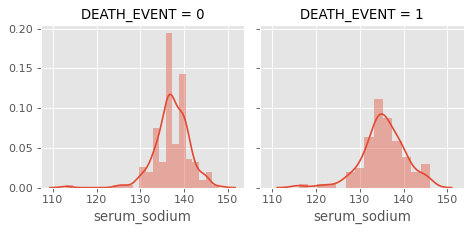

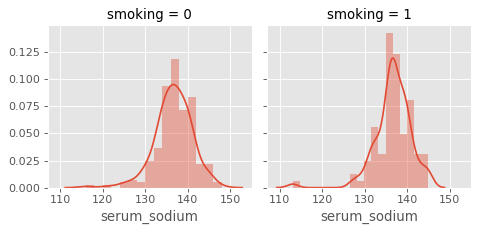

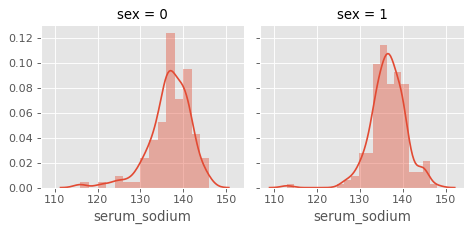

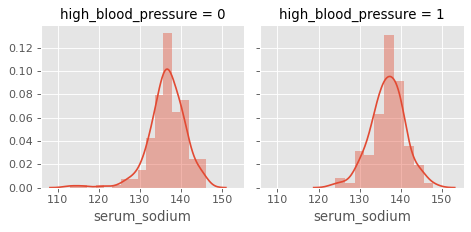

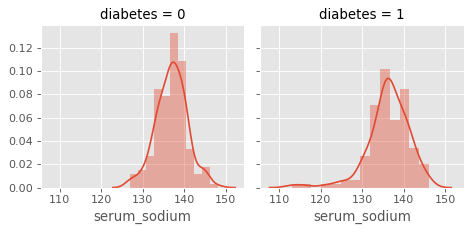

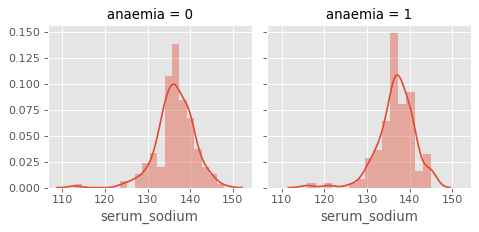

In [22]:
#serum_sodium
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "serum_sodium")

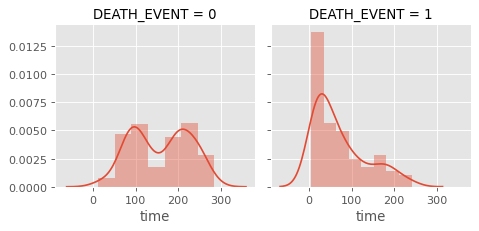

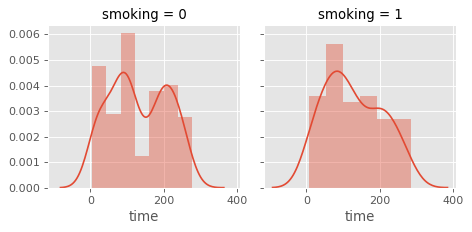

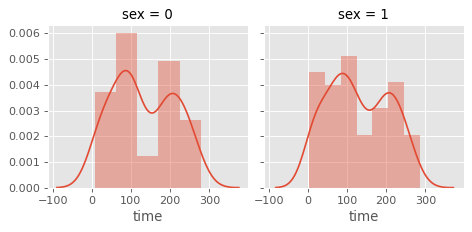

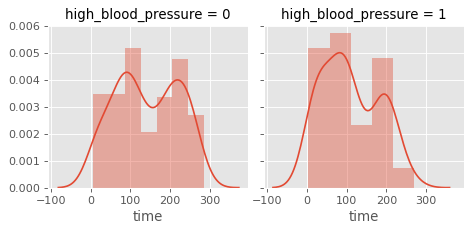

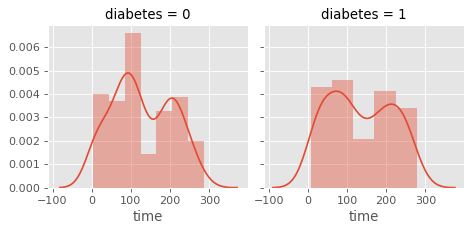

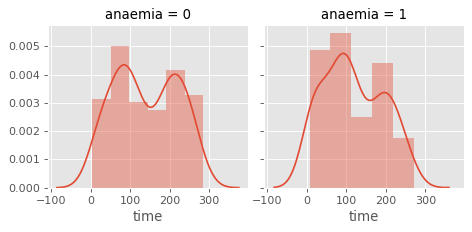

In [23]:
#time
for cols in cat_col:
    g = sns.FacetGrid(data, col=cols)
    g = g.map(sns.distplot, "time")

Catplot of DEATH_EVENT+age+sex+HBP for all numericl variables with Type = BOX plot 

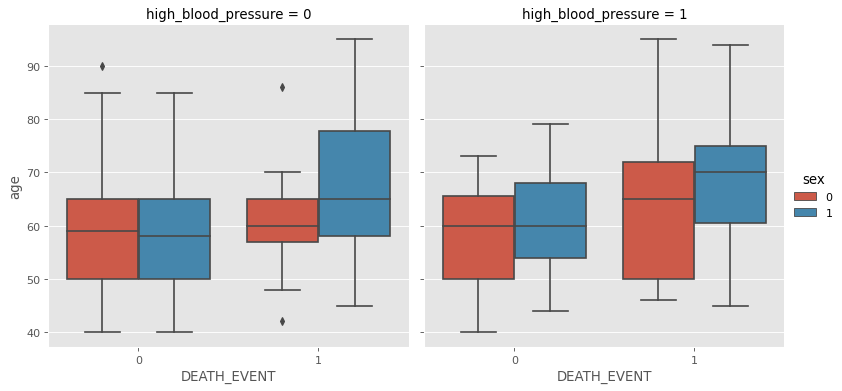

In [24]:
sns.catplot(x='DEATH_EVENT',y='age',data=data,kind='box',hue='sex', col='high_blood_pressure')

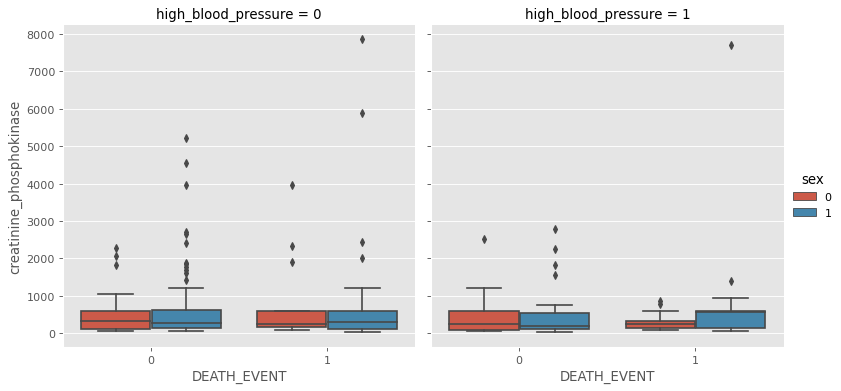

In [25]:
sns.catplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=data,kind='box',hue='sex', col='high_blood_pressure')

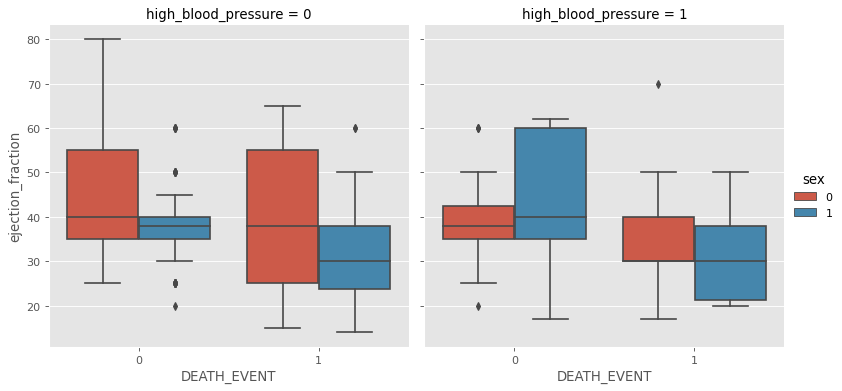

In [26]:
sns.catplot(x='DEATH_EVENT',y='ejection_fraction',data=data,kind='box',hue='sex', col='high_blood_pressure')

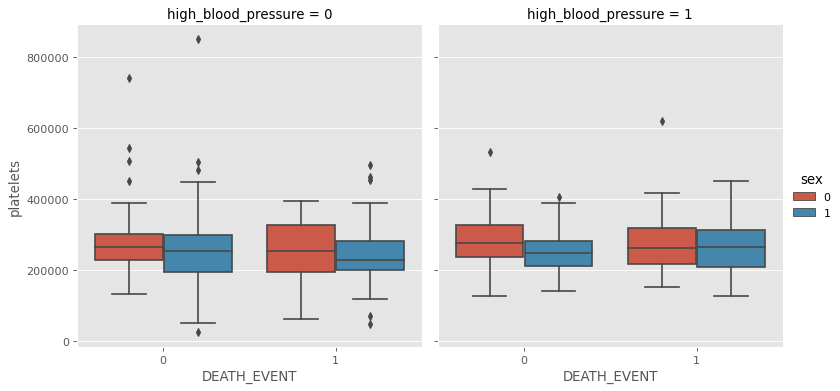

In [27]:
sns.catplot(x='DEATH_EVENT',y='platelets',data=data,kind='box',hue='sex', col='high_blood_pressure')

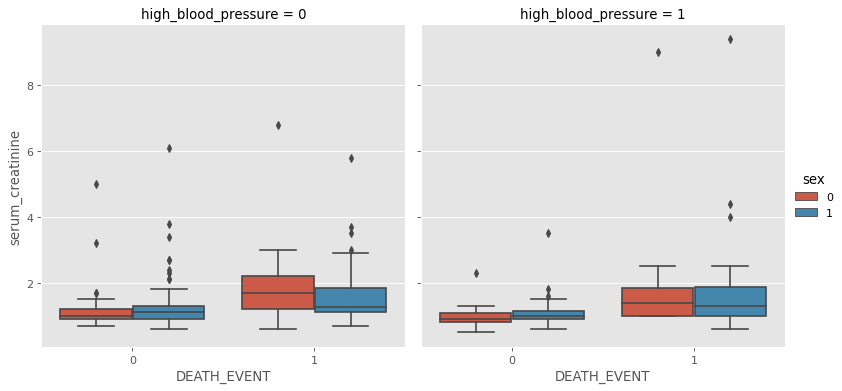

In [28]:
sns.catplot(x='DEATH_EVENT',y='serum_creatinine',data=data,kind='box',hue='sex', col='high_blood_pressure')

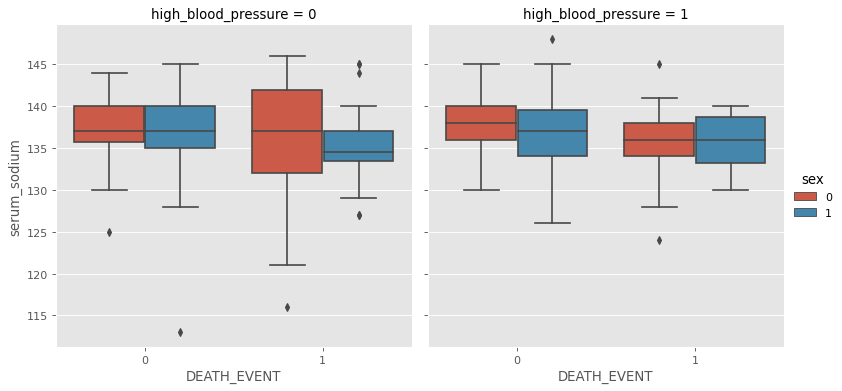

In [29]:
sns.catplot(x='DEATH_EVENT',y='serum_sodium',data=data,kind='box',hue='sex', col='high_blood_pressure')

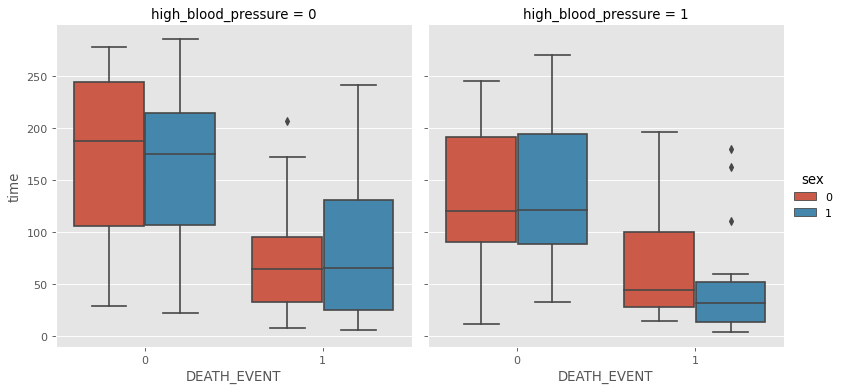

In [30]:
sns.catplot(x='DEATH_EVENT',y='time',data=data,kind='box',hue='sex', col='high_blood_pressure')

Outlier detection and removal

In [31]:
features = num_col

# Detect observations with more than one outlier
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        print("col", col)
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        print("Q1", Q1)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        print("Q3", Q3)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        #print("IQR", IQR)
        # outlier step
        outlier_step = 1.5 * IQR
        print("outlier_step", outlier_step)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    #print("outlier_indices",outlier_indices)
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))


col age
Q1 51.0
Q3 70.0
outlier_step 28.5
col creatinine_phosphokinase
Q1 116.5
Q3 582.0
outlier_step 698.25
col ejection_fraction
Q1 30.0
Q3 45.0
outlier_step 22.5
col platelets
Q1 212500.0
Q3 303500.0
outlier_step 136500.0
col serum_creatinine
Q1 0.9
Q3 1.4
outlier_step 0.7499999999999998
col serum_sodium
Q1 134.0
Q3 140.0
outlier_step 9.0
col time
Q1 73.0
Q3 203.0
outlier_step 195.0
The dataset contains 0 observations with more than 2 outliers


No outliers > 2, hence no need to drop any columns

We will use only top three columns which have highest correlation with the target variable
* time (-ve correlation), serum_creatinine (+ve) & ejection_fraction (-ve)  


In [32]:
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["DEATH_EVENT"]

# Train Test split
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)


I will use XGBoost to predict.

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [34]:
### Gridsearch for XGB starts #### 
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
#Creating the classifier
model_xg = XGBClassifier(random_state=2)
grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(train_x, train_y)

# make predictions for test data
y_pred = grid_search.predict(test_x)
predictions = [round(value) for value in y_pred]

Calculate Accuracy

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(test_y, predictions)
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))

XGB Accuracy: 88.33%


Text(133.17777777777778, 0.5, 'Predicted')

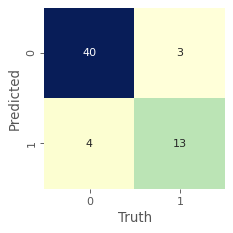

In [36]:
###### confusion matrix  starts ######
cm_xgb = confusion_matrix(test_y,predictions) 
names = np.unique(predictions)
sns.heatmap(cm_xgb, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')

plt.xlabel('Truth')
plt.ylabel('Predicted')
###### Confusion matrix ends ########

KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
Misclassified_sample = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print("Misclassified_sample = ", Misclassified_sample)


Misclassified_sample =  [6, 6, 8, 7, 5, 5, 5, 5, 5, 5, 3, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 8, 8, 8, 8, 8, 8]


Lowest number of mis-classified samples is for K=11

In [38]:
KNN_classifier = KNeighborsClassifier(n_neighbors=11)

# Fitting the values fo X and Y
KNN_classifier.fit(train_x, train_y)

#Predicting the test values with Model
prediction =  KNN_classifier.predict(test_x)

In [39]:
#calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print("accuracy_score KNN=11 :",accuracy_score)

accuracy_score KNN=11 : 0.95


Text(133.17777777777778, 0.5, 'Predicted')

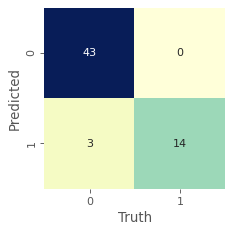

In [40]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_knn = confusion_matrix(test_y,prediction) 
names = np.unique(prediction)
sns.heatmap(cm_knn, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
###### Confusion matrix ends ########

In [41]:
#print misclassified values
print("Misclassified values for Knn=11:  %d" % (test_y != prediction).sum())


Misclassified values for Knn=11:  3


Conclusion : We achieved 95% accuracy with K Nearest Neignbours !!

Please upvote if you liked my Kernel